In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_absolute_percentage_error, mean_squared_error, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [164]:
df = pd.read_csv("heart_disease.csv")

In [165]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


- There are total 12 features in the dataset.


1. Age: The person's age in years


2. Sex: The person's sex (M-> Male, F-> Female)


3. ChestPainType: The chest pain experienced. There are 4 types.
    - TA: Typical Angina
    - ATA: ATypical Angina
    - NAP: Non- Anginal Pain
    - ASY: Asymptomatic


4. RestingBP: The person's resting blood pressure (in mm Hg)


5. Cholesterol: The person's cholesterol measurement in mg/dl


6. FastingBS: The person's fasting blood sugar (> 120 mg/dl => 1 = true; 0 = false)


7. RestingECG: Resting electrocardiographic measurement (Normal, ST, LVH )


8. MaxHR: The person's maximum heart rate achieved


9. ExerciseAngina: Exercise induced angina (Y, N)


10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)


11. ST_Slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)


12. HeartDisease(target variable): Whether a person has a heart disease or not (0 = No heart disease, 1= has a heart disease)

In [166]:
df.shape

(918, 12)

   - We have considered 918 patients record in our dataset.

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Exploratory Data Analysis (EDA)

Let's find how many people have heart disease and how many people doesn't have heart disease

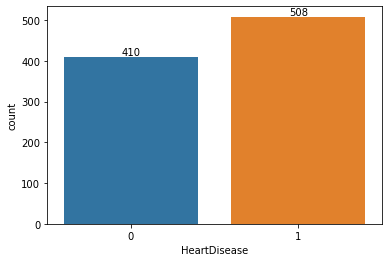

In [168]:
ax = sns.countplot(x='HeartDisease', data=df)
for i in ax.containers:
    ax.bar_label(i,)

- Under our analysis, we found that 508 people are suffering from heart disease, and 410 are healthy.

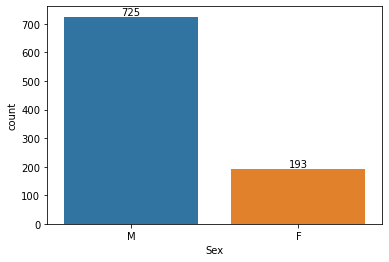

In [169]:
ax = sns.countplot(x='Sex', data=df)
for i in ax.containers:
    ax.bar_label(i,)

- There are 725 Males and 193 Females in the dataset considered. 

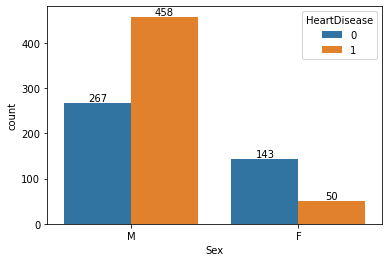

In [170]:
ax = sns.countplot(x='Sex', hue='HeartDisease' ,data=df)
for i in ax.containers:
    ax.bar_label(i,)

- The proportion of infected men is greater than that of females.

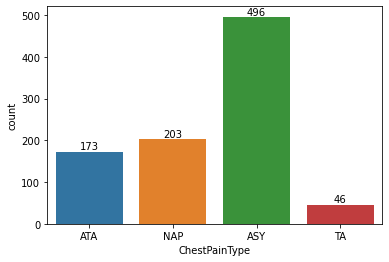

In [171]:
ax = sns.countplot(x='ChestPainType', data=df)
for i in ax.containers:
    ax.bar_label(i,)

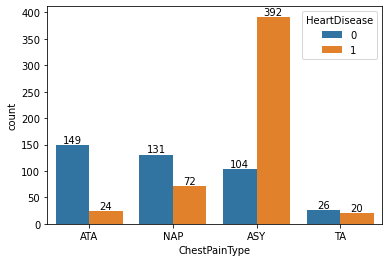

In [172]:
ax = sns.countplot(x='ChestPainType', hue='HeartDisease' ,data=df)
for i in ax.containers:
    ax.bar_label(i,)

- From this plot, we observe that those who have chest pain of type ASY is more likely to affected by heart disease.

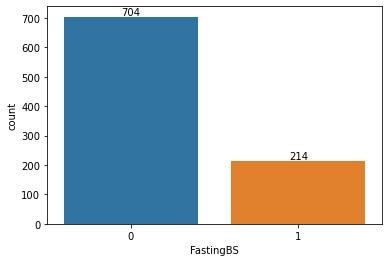

In [173]:
ax = sns.countplot(x='FastingBS', data=df)
for i in ax.containers:
    ax.bar_label(i,)

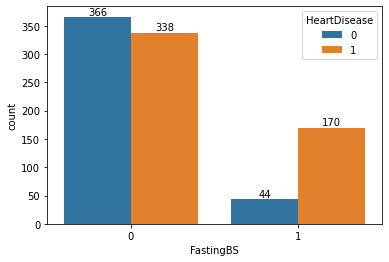

In [174]:
ax = sns.countplot(x='FastingBS', hue='HeartDisease',data=df)
for i in ax.containers:
    ax.bar_label(i,)

- People having blood sugar are more likely to have heart disease.

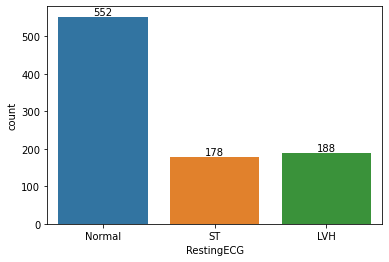

In [175]:
ax = sns.countplot(x='RestingECG', data=df)
for i in ax.containers:
    ax.bar_label(i,)

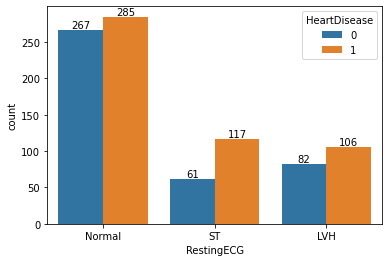

In [176]:
ax = sns.countplot(x='RestingECG', hue='HeartDisease',data=df)
for i in ax.containers:
    ax.bar_label(i,)

### write here

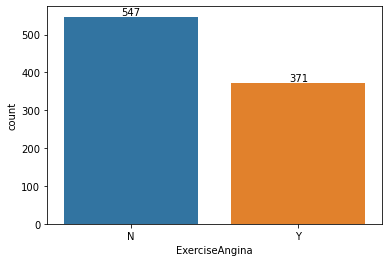

In [177]:
ax = sns.countplot(x='ExerciseAngina',data=df)
for i in ax.containers:
    ax.bar_label(i,)

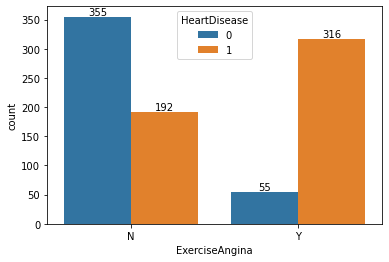

In [178]:
ax = sns.countplot(x='ExerciseAngina', hue='HeartDisease',data=df)
for i in ax.containers:
    ax.bar_label(i,)

- write here

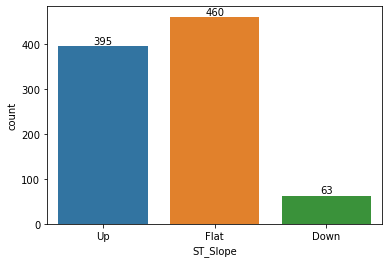

In [179]:
ax = sns.countplot(x='ST_Slope',data=df)
for i in ax.containers:
    ax.bar_label(i,)

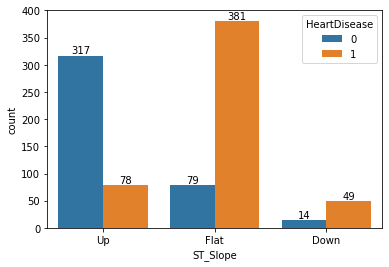

In [180]:
ax = sns.countplot(x='ST_Slope', hue='HeartDisease',data=df)
for i in ax.containers:
    ax.bar_label(i,)

- write here

In [181]:
# Dividing

In [182]:
category = []
continuos = []
for cols in df.columns:
    if len(df[cols].unique()) < 10:
        category.append(cols)
    else:
        continuos.append(cols)

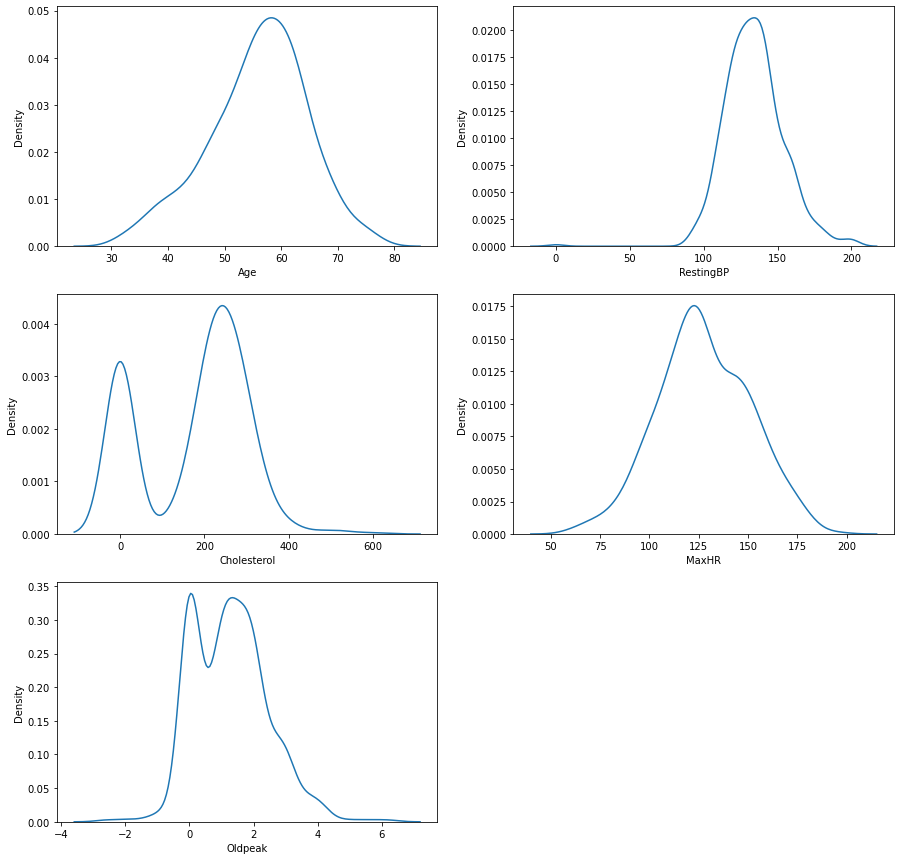

In [183]:
plt.figure(figsize=(15, 15))

for i , col in enumerate(continuos, 1):
    plt.subplot(3, 2, i)
    #df[df.HeartDisease == 0][col].hist(bins=30, label='No Heart Disease', alpha=0.8)
    #df[df.HeartDisease == 1][col].hist(bins=30)
    sns.kdeplot(data=df[df.HeartDisease==1]  , x=col)
    #plt.legend()
    plt.xlabel(col)

- People with age ranging from 47 to 62 are more likely to have heart disease.
- Resting blood pressure anything above 125-141 is generally of concern.
- People with a maximum of over 125 are more likely to have heart disease.

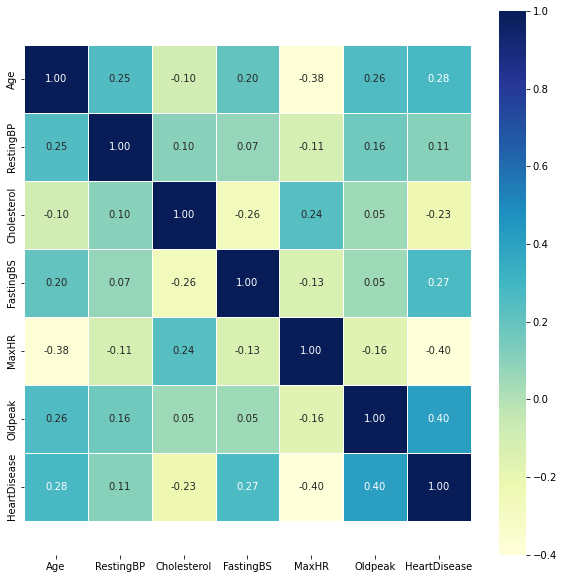

In [184]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

- There are different types of correlation between the columns as positive and negative correlation, also there are no correlation between some columns.

In [185]:
category

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

Finding the outliers

<AxesSubplot:xlabel='RestingBP'>

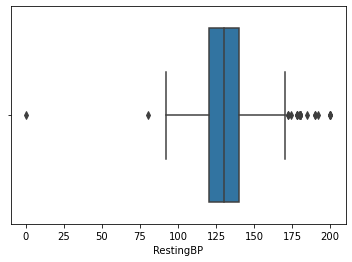

In [186]:
sns.boxplot(data=df, x='RestingBP')

In [187]:
q1 = np.percentile(df.RestingBP.sort_values(), 25)
q3 = np.percentile(df.RestingBP.sort_values(), 75)
print(q1, q3)
iqr = q3 - q1
l_out = q1 - (1.5*iqr)
h_out = q3 + (1.5*iqr)
print(l_out, h_out)
df = df[(df.RestingBP >= 90)  & (df.RestingBP <= 170) ] 
df.head()
df.shape

120.0 140.0
90.0 170.0


(890, 12)

In [188]:
continuos

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [189]:
category

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [190]:
category.remove('HeartDisease')

In [191]:
dfs = pd.get_dummies(df, columns=category)

In [192]:
dfs.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [193]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 917
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                890 non-null    int64  
 1   RestingBP          890 non-null    int64  
 2   Cholesterol        890 non-null    int64  
 3   MaxHR              890 non-null    int64  
 4   Oldpeak            890 non-null    float64
 5   HeartDisease       890 non-null    int64  
 6   Sex_F              890 non-null    uint8  
 7   Sex_M              890 non-null    uint8  
 8   ChestPainType_ASY  890 non-null    uint8  
 9   ChestPainType_ATA  890 non-null    uint8  
 10  ChestPainType_NAP  890 non-null    uint8  
 11  ChestPainType_TA   890 non-null    uint8  
 12  FastingBS_0        890 non-null    uint8  
 13  FastingBS_1        890 non-null    uint8  
 14  RestingECG_LVH     890 non-null    uint8  
 15  RestingECG_Normal  890 non-null    uint8  
 16  RestingECG_ST      890 non

In [194]:
#sc = StandardScaler()
#dfs[continuos] = sc.fit_transform(dfs[continuos])

In [195]:
dfs.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [196]:
category = []
continuos = []
for cols in dfs.columns:
    if len(dfs[cols].unique()) < 10:
        category.append(cols)

In [197]:
category

['HeartDisease',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'FastingBS_0',
 'FastingBS_1',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [198]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 917
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                890 non-null    int64  
 1   RestingBP          890 non-null    int64  
 2   Cholesterol        890 non-null    int64  
 3   MaxHR              890 non-null    int64  
 4   Oldpeak            890 non-null    float64
 5   HeartDisease       890 non-null    int64  
 6   Sex_F              890 non-null    uint8  
 7   Sex_M              890 non-null    uint8  
 8   ChestPainType_ASY  890 non-null    uint8  
 9   ChestPainType_ATA  890 non-null    uint8  
 10  ChestPainType_NAP  890 non-null    uint8  
 11  ChestPainType_TA   890 non-null    uint8  
 12  FastingBS_0        890 non-null    uint8  
 13  FastingBS_1        890 non-null    uint8  
 14  RestingECG_LVH     890 non-null    uint8  
 15  RestingECG_Normal  890 non-null    uint8  
 16  RestingECG_ST      890 non

In [199]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 917
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                890 non-null    int64  
 1   RestingBP          890 non-null    int64  
 2   Cholesterol        890 non-null    int64  
 3   MaxHR              890 non-null    int64  
 4   Oldpeak            890 non-null    float64
 5   HeartDisease       890 non-null    int64  
 6   Sex_F              890 non-null    uint8  
 7   Sex_M              890 non-null    uint8  
 8   ChestPainType_ASY  890 non-null    uint8  
 9   ChestPainType_ATA  890 non-null    uint8  
 10  ChestPainType_NAP  890 non-null    uint8  
 11  ChestPainType_TA   890 non-null    uint8  
 12  FastingBS_0        890 non-null    uint8  
 13  FastingBS_1        890 non-null    uint8  
 14  RestingECG_LVH     890 non-null    uint8  
 15  RestingECG_Normal  890 non-null    uint8  
 16  RestingECG_ST      890 non

In [200]:
def performance_evaluation(y , y_pred):
    print("Accuracy score of test data:", np.round(accuracy_score(y, y_pred)*100, 2))
    print("Recall score of test data:  ", np.round(recall_score(y, y_pred)*100, 2))
    print("F1 score of test data:      ", np.round(f1_score(y, y_pred)*100, 2))

In [201]:
def performance_graph(acc, rec, f, d):
    plt.figure(figsize=(10,6))
    plt.plot(d,acc,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Accuracy vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()
    plt.figure(figsize=(10,6))
    plt.plot(d,rec,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Recall vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Recall')
    plt.show()
    plt.figure(figsize=(10,6))
    plt.plot(d,f,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('F1 Score vs. K Value')
    plt.xlabel('K')
    plt.ylabel('F1 Score')
    plt.show()

In [202]:
X = dfs.drop('HeartDisease', axis = 1)
y = dfs.HeartDisease

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

In [204]:
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of test data: 66.85
Recall score of test data:   74.12
F1 score of test data:       68.11


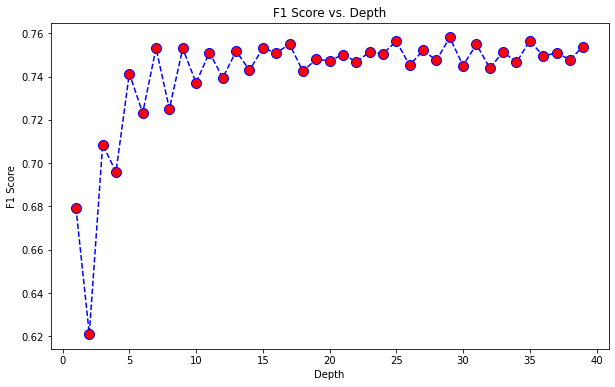

In [207]:
depth = np.arange(1,40)
mean_f1 = []

for k in depth:
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn = cross_validate(estimator=knn_model, X=X_train,  y=y_train, cv=5, scoring='f1')
    mean_f1.append(np.mean(knn['test_score']))

plt.figure(figsize=(10,6))
plt.plot(depth,mean_f1,  color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 Score vs. Depth')
plt.xlabel('Depth')
plt.ylabel('F1 Score')
plt.show()    

In [208]:
# Test
k = 7
knn = KNeighborsClassifier(n_neighbors= k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of test data: 73.03
Recall score of test data:   83.53
F1 score of test data:       74.74


In [47]:
df = pd.read_csv("heart_disease.csv")

In [129]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [130]:
X = dfs.drop('HeartDisease', axis = 1)
y = dfs.HeartDisease

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

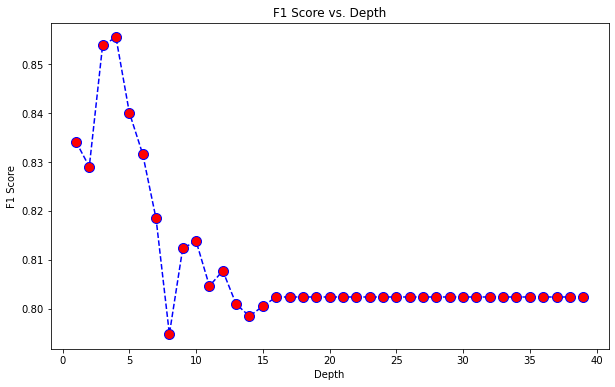

In [159]:
depth = np.arange(1,40)
mean_f1 = []


for k in depth:
    dtm = DecisionTreeClassifier(max_depth=k, criterion='gini', random_state=3)
    dtr = cross_validate(estimator=dtm, X=X_train,  y=y_train, cv=5, scoring='f1')
    mean_f1.append(np.mean(dtr['test_score']))
    
plt.figure(figsize=(10,6))
plt.plot(depth,mean_f1,  color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 Score vs. Depth')
plt.xlabel('Depth')
plt.ylabel('F1 Score')
plt.show()

In [209]:
reg_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, criterion='gini')
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)

performance_evaluation(y_test, y_pred)

Accuracy score of test data: 83.71
Recall score of test data:   90.59
F1 score of test data:       84.15


In [54]:
# Logistic

In [55]:
logi = LogisticRegression(solver='liblinear')
logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
performance_evaluation(y_test, y_pred)

Accuracy score of test data: 86.52
Recall score of test data:   92.94
F1 score of test data:       86.81
